In [1]:
import pandas as pd
import numpy as np
import math as math

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
from sklearn import metrics

import matplotlib.pyplot as plt


In [2]:
data_source_path = "./source/"
data_source_files = ["Female-PTDB.csv", "Female-TMIT.csv", "Male-PTDB.csv", "Male-TMIT.csv"]

data_source_files_with_noise = ["Noizeus-Babble.csv", "Noizeus-Car.csv", "Noizeus-NoNoise.csv", 
                                "Noizeus-Restaurant.csv", "Noizeus-Station.csv", "Noizeus-Street.csv", 
                                "Noizeus-Train.csv"]





In [3]:
# load datasets
n_babble_df = pd.read_csv(data_source_path + data_source_files_with_noise[0]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
n_car_df = pd.read_csv(data_source_path + data_source_files_with_noise[1]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
n_nonoise_df = pd.read_csv(data_source_path + data_source_files_with_noise[2]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
n_restaurant_df = pd.read_csv(data_source_path + data_source_files_with_noise[3]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
n_station_df = pd.read_csv(data_source_path + data_source_files_with_noise[4]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
n_street_df = pd.read_csv(data_source_path + data_source_files_with_noise[5]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
n_train_df = pd.read_csv(data_source_path + data_source_files_with_noise[6]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})

# combine datasets
full_withnoise_df = pd.concat([n_babble_df, n_car_df, n_nonoise_df, n_restaurant_df, n_station_df, n_street_df, n_train_df], ignore_index=True)
full_withnoise_df


,zcr,rms,spectral_cetroid,spectral_rolloff,spectral_flux,spectral_crest,mfcc 1,mfcc 2,mfcc 3,mfcc 4,mfcc 5,mfcc 6,mfcc 7,mfcc 8,mfcc 9,mfcc 10,mfcc 11,mfcc 12,mfcc 13,label
0,0.067480,0.014003,1252.072042,2353.579102,0.000634,0.036830,-400.27832,235.95964,-106.796005,0.056166,27.075779,-56.186157,-33.089775,-7.088399,-38.651585,-11.094110,6.848748,-20.194866,-8.490868,False
1,0.056543,0.014956,1108.341028,2084.414062,0.000634,0.036830,-413.85336,264.32867,-105.791240,-4.294174,28.579357,-59.673830,-22.032665,-3.675573,-40.700886,-3.706795,6.324492,-20.581818,0.677200,False
2,0.046680,0.018747,1042.511071,1929.375000,0.000634,0.036830,-366.19098,220.37051,-78.318375,-7.798753,4.226619,-49.197327,-27.135250,-12.665627,-37.858090,-16.590418,-7.137137,-25.410772,-6.856580,False
3,0.039355,0.028922,965.001824,1914.301758,0.000634,0.036830,-368.97647,253.92090,-81.486330,-7.253069,31.278433,-45.258450,-23.949402,-0.750920,-38.350880,-16.148422,-1.291950,-30.791580,-11.120714,False
4,0.041016,0.027191,997.280091,1937.988281,0.000634,0.036830,-348.39618,230.37402,-76.895370,-3.285618,12.548368,-41.711308,-21.581696,-0.672494,-27.006943,-19.164570,-11.892619,-28.712702,-16.641628,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12147,0.119141,0.020306,1789.718774,2829.462891,0.000772,0.022071,-343.20410,213.72339,-142.700620,10.520731,26.537085,-65.996840,-20.455010,8.633670,-40.320965,-19.822733,-0.386109,-20.930935,-1.126904,False
12148,0.121777,0.025095,1762.664725,2790.703125,0.000772,0.022071,-353.88763,253.22595,-161.726970,13.808258,39.321660,-77.625656,-15.114021,10.817914,-40.293890,-10.846709,2.528954,-25.227688,0.690899,False
12149,0.118555,0.029932,1834.853679,2846.689453,0.000772,0.022071,-278.39526,188.48898,-126.913960,2.296159,23.908407,-60.665160,-26.359623,3.369575,-35.673230,-15.905278,0.894727,-20.005066,-2.636400,False
12150,0.105176,0.032779,1699.167987,2741.176758,0.000772,0.022071,-310.85983,231.20401,-145.085710,5.652969,33.587585,-71.358570,-27.630926,7.616194,-39.148666,-15.707787,1.724593,-24.886887,-4.870235,False


In [4]:
# load datasets
female_ptdb_df = pd.read_csv(data_source_path + data_source_files[0]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
female_tmit_df = pd.read_csv(data_source_path + data_source_files[1]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
male_ptdb_df = pd.read_csv(data_source_path + data_source_files[2]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})
male_tmit_df = pd.read_csv(data_source_path + data_source_files[3]).iloc[:, 1:].rename(columns = {'ground_truth':'label'})


# combine datasets
full_nonoise_df = pd.concat([female_ptdb_df, female_tmit_df, male_ptdb_df, male_tmit_df], ignore_index=True)
full_nonoise_df

,zcr,rms,spectral_cetroid,spectral_rolloff,spectral_flux,spectral_crest,mfcc 1,mfcc 2,mfcc 3,mfcc 4,mfcc 5,mfcc 6,mfcc 7,mfcc 8,mfcc 9,mfcc 10,mfcc 11,mfcc 12,mfcc 13,label
0,0.078906,0.000226,3894.172396,7960.825195,0.000289,0.019121,-679.62380,34.850086,16.685300,22.100058,7.687350,14.396711,-2.478875,6.976376,-0.960166,9.306094,4.797767,7.476912,3.838891,False
1,0.132422,0.000195,3818.758658,7913.452148,0.000289,0.019121,-676.12805,41.850094,18.115484,18.258718,5.341282,17.687515,1.568857,12.707722,2.604640,8.639200,5.875511,6.622043,1.457237,False
2,0.149023,0.000154,3667.845026,7952.211914,0.000289,0.019121,-680.80066,53.271057,16.051815,15.571219,7.883388,13.552220,4.892397,9.417494,-0.932370,7.325538,5.002689,8.220623,-1.664876,False
3,0.143066,0.000153,3638.891936,7934.985352,0.000289,0.019121,-682.80680,53.315132,15.652989,15.850302,9.741061,14.765318,5.449076,8.588926,-0.961747,8.444372,-0.179497,6.368813,0.054870,False
4,0.100879,0.000202,3477.161682,7797.172852,0.000289,0.019121,-683.41693,51.226890,18.926594,20.186535,6.267492,13.525415,7.289101,14.895956,3.922064,6.131344,0.054778,9.181032,-0.176276,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56105,0.098730,0.000358,2081.511061,4500.439453,0.000083,0.013505,-638.57650,112.903730,-30.076542,27.566034,-18.518550,14.489972,-4.514703,8.439515,-15.572653,5.821048,7.081314,9.425398,-0.096451,False
56106,0.109082,0.000305,2281.715277,4289.414062,0.000083,0.013505,-649.44460,106.873000,-41.345960,22.769505,-27.545710,14.155927,4.928344,3.304439,-16.337788,10.560347,-2.828632,9.812967,-0.201021,False
56107,0.112109,0.000119,2578.327334,5320.854492,0.000083,0.013505,-712.06320,90.672500,-15.080589,18.369724,-23.264654,20.386620,-1.585826,-0.552326,-13.015355,10.830726,-3.300986,7.341312,-1.151447,False
56108,0.108594,0.000069,2910.688507,6199.409180,0.000083,0.013505,-754.02630,78.074430,-7.041000,15.133078,-23.212465,14.904060,-7.863165,5.802657,-15.028173,1.702991,-5.031804,10.190687,-0.372080,False


In [5]:
full_df = pd.concat([full_withnoise_df, full_nonoise_df], ignore_index=True)
full_df



,zcr,rms,spectral_cetroid,spectral_rolloff,spectral_flux,spectral_crest,mfcc 1,mfcc 2,mfcc 3,mfcc 4,mfcc 5,mfcc 6,mfcc 7,mfcc 8,mfcc 9,mfcc 10,mfcc 11,mfcc 12,mfcc 13,label
0,0.067480,0.014003,1252.072042,2353.579102,0.000634,0.036830,-400.27832,235.959640,-106.796005,0.056166,27.075779,-56.186157,-33.089775,-7.088399,-38.651585,-11.094110,6.848748,-20.194866,-8.490868,False
1,0.056543,0.014956,1108.341028,2084.414062,0.000634,0.036830,-413.85336,264.328670,-105.791240,-4.294174,28.579357,-59.673830,-22.032665,-3.675573,-40.700886,-3.706795,6.324492,-20.581818,0.677200,False
2,0.046680,0.018747,1042.511071,1929.375000,0.000634,0.036830,-366.19098,220.370510,-78.318375,-7.798753,4.226619,-49.197327,-27.135250,-12.665627,-37.858090,-16.590418,-7.137137,-25.410772,-6.856580,False
3,0.039355,0.028922,965.001824,1914.301758,0.000634,0.036830,-368.97647,253.920900,-81.486330,-7.253069,31.278433,-45.258450,-23.949402,-0.750920,-38.350880,-16.148422,-1.291950,-30.791580,-11.120714,False
4,0.041016,0.027191,997.280091,1937.988281,0.000634,0.036830,-348.39618,230.374020,-76.895370,-3.285618,12.548368,-41.711308,-21.581696,-0.672494,-27.006943,-19.164570,-11.892619,-28.712702,-16.641628,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68257,0.098730,0.000358,2081.511061,4500.439453,0.000083,0.013505,-638.57650,112.903730,-30.076542,27.566034,-18.518550,14.489972,-4.514703,8.439515,-15.572653,5.821048,7.081314,9.425398,-0.096451,False
68258,0.109082,0.000305,2281.715277,4289.414062,0.000083,0.013505,-649.44460,106.873000,-41.345960,22.769505,-27.545710,14.155927,4.928344,3.304439,-16.337788,10.560347,-2.828632,9.812967,-0.201021,False
68259,0.112109,0.000119,2578.327334,5320.854492,0.000083,0.013505,-712.06320,90.672500,-15.080589,18.369724,-23.264654,20.386620,-1.585826,-0.552326,-13.015355,10.830726,-3.300986,7.341312,-1.151447,False
68260,0.108594,0.000069,2910.688507,6199.409180,0.000083,0.013505,-754.02630,78.074430,-7.041000,15.133078,-23.212465,14.904060,-7.863165,5.802657,-15.028173,1.702991,-5.031804,10.190687,-0.372080,False


In [6]:
positive_df = full_df.loc[full_df["label"] == True]
negative_df = full_df.loc[full_df["label"] == False]
print(positive_df.shape[0])
print(negative_df.shape[0])

31462
36800


In [7]:
full_balanced_df = pd.concat([positive_df, shuffle(negative_df).iloc[:31462,:]], ignore_index=True)
full_balanced_df = shuffle(full_balanced_df)

In [8]:
feature_list = list(full_df.columns)[:-1]


In [10]:
def run_random_forest(full_df, feature_names):
    # Random Forest with k-fold cross validation

    X = full_df.iloc[:, :-1]
    y = full_df.iloc[:, -1]

    # Evaluating the quality of a model’s predictions using scoring parameter
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    rf = RandomForestClassifier()

    a = 0
    f1 = 0

    i = 0

    for train_ix, test_ix in kf.split(X):
        print("train with partition " + str(i) + "...")
        X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        rf = rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        a += metrics.accuracy_score(y_test, y_pred)
        f1 += metrics.f1_score(y_test, y_pred)
        i += 1
            
        # plot feature importance 
        importances = rf.feature_importances_
        std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

        forest_importances = pd.Series(importances, index=feature_names)
        fig, ax = plt.subplots()
        forest_importances.plot.bar(yerr=std, ax=ax)
        ax.set_title("Random Forest feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()
        plt.show()

    a /= 5
    f1 /= 5

    print("Average Accuracy: ", a, "Average F1 Score: ", f1)

In [9]:
def run_svm(full_df):
    # Random Forest with k-fold cross validation

    X = full_df.iloc[:, :-1]
    y = full_df.iloc[:, -1]

    # Evaluating the quality of a model’s predictions using scoring parameter
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    clf = SVC()

    a = 0
    f1 = 0

    i = 0

    for train_ix, test_ix in kf.split(X):
        print("train with partition " + str(i) + "...")
        X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        a += metrics.accuracy_score(y_test, y_pred)
        f1 += metrics.f1_score(y_test, y_pred)
        i += 1

    a /= 5
    f1 /= 5

    print("Average Accuracy: ", a, "Average F1 Score: ", f1)

In [11]:
def run_adaboost(full_df, feature_names):
    # Random Forest with k-fold cross validation

    X = full_df.iloc[:, :-1]
    y = full_df.iloc[:, -1]

    # Evaluating the quality of a model’s predictions using scoring parameter
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    clf = AdaBoostClassifier()

    a = 0
    f1 = 0

    i = 0

    for train_ix, test_ix in kf.split(X):
        print("train with partition " + str(i) + "...")
        X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        a += metrics.accuracy_score(y_test, y_pred)
        f1 += metrics.f1_score(y_test, y_pred)
        i += 1
            
        # plot feature importance 
        importances = clf.feature_importances_
        std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

        forest_importances = pd.Series(importances, index=feature_names)
        fig, ax = plt.subplots()
        forest_importances.plot.bar(yerr=std, ax=ax)
        ax.set_title("Adaboost feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()
        plt.show()

    a /= 5
    f1 /= 5

    print("Average Accuracy: ", a, "Average F1 Score: ", f1)

train with partition 0...


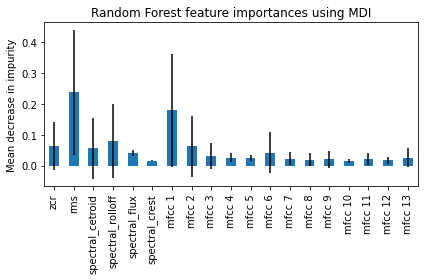

train with partition 1...


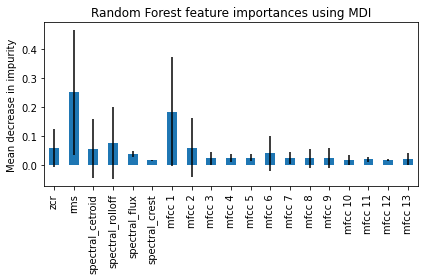

train with partition 2...


KeyboardInterrupt: 

In [12]:
run_random_forest(full_balanced_df, feature_list)

In [ ]:
run_svm(full_balanced_df)

train with partition 0...


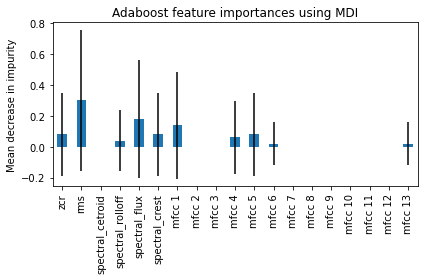

train with partition 1...


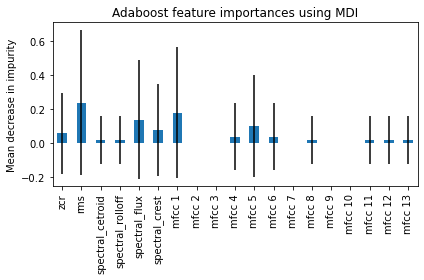

train with partition 2...


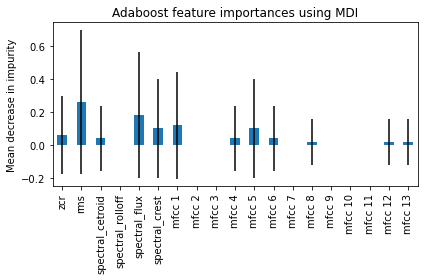

train with partition 3...


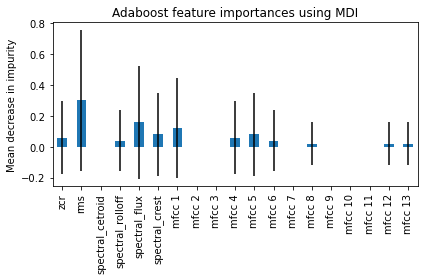

train with partition 4...


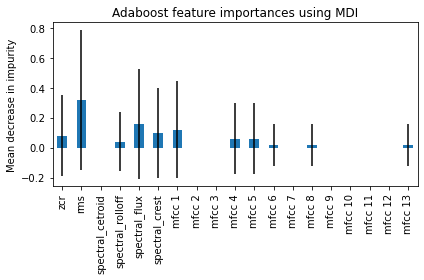

Average Accuracy:  0.9032166114666926 Average F1 Score:  0.9052995307004847


In [13]:
run_adaboost(full_balanced_df, feature_list)